### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",93)
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

### Data loading and overview

In [2]:
leads_df = pd.read_csv("Leads.csv")

In [3]:
leads_df.head(23)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
leads_df.shape

(9240, 37)

No of rows : 9240

No of columns : 37

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Checking the unique values in each column

In [6]:
for col in leads_df.columns:
    print(col,':')
    print(leads_df[col].unique())
    print('----------------------------')

Prospect ID :
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
----------------------------
Lead Number :
[660737 660728 660727 ... 579545 579538 579533]
----------------------------
Lead Origin :
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
----------------------------
Lead Source :
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
----------------------------
Do Not Email :
['No' 'Yes']
----------------------------
Do Not Call :
['No' 'Yes']
----------------------------
Converted :
[0 1]
----------------------------
Tota

Below columns are having only one unique value and this doesn't help for our analysis in predicting the target variable

'Magazine',

'Receive More Updates About Our Courses',

'Update me on Supply Chain Content',

'Get updates on DM Content',

'I agree to pay the amount through cheque'

Replacing the Select value in multiple columns to nan as both of them interpret the same

In [7]:
leads_df.replace('Select',np.nan,inplace=True)

Calculating the null value percentage of each column

In [8]:
null_values = pd.DataFrame((leads_df.isnull().sum()/leads_df.shape[0])*100).sort_values(by=0,ascending=False)
null_values.reset_index(inplace=True)
null_values.rename(columns={'index' : 'Column Name',0:'Null Value %'},inplace=True)
null_values

,Column Name,Null Value %
0,How did you hear about X Education,78.463203
1,Lead Profile,74.188312
2,Lead Quality,51.590909
3,Asymmetrique Profile Score,45.649351
4,Asymmetrique Activity Score,45.649351
5,Asymmetrique Activity Index,45.649351
6,Asymmetrique Profile Index,45.649351
7,City,39.707792
8,Specialization,36.580087
9,Tags,36.287879


Drop columns where null value % is > 40

In [9]:
for column_name in list(null_values[null_values['Null Value %']>40]['Column Name']):
    leads_df.drop(column_name, axis=1, inplace=True)

Drop Prospect ID an Lead Number as these are unique keys and doesn't help to predict our target variable

In [10]:
leads_df.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

Drop the columns where the unique value is only one

In [11]:
for col in leads_df.columns:
        if len(leads_df[col].unique())==1:
            leads_df.drop(col, axis=1, inplace=True)

In [12]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

### Categorical Variable Analysis

Analyse 'Country' column

In [13]:
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Replace NaN values with India as it's the most occuring value (Mode)

In [14]:
leads_df['Country'].replace(np.nan, 'India', inplace=True)

In [15]:
(leads_df['Country'].value_counts()/leads_df.shape[0])*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

'India' contributed to almost 97% of the country column. Country can be dropped

In [16]:
leads_df.drop('Country', axis=1, inplace=True)

Analyse 'City' column

In [17]:
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads_df['City'].replace(np.nan, 'Mumbai', inplace=True)

<AxesSubplot:xlabel='City', ylabel='count'>

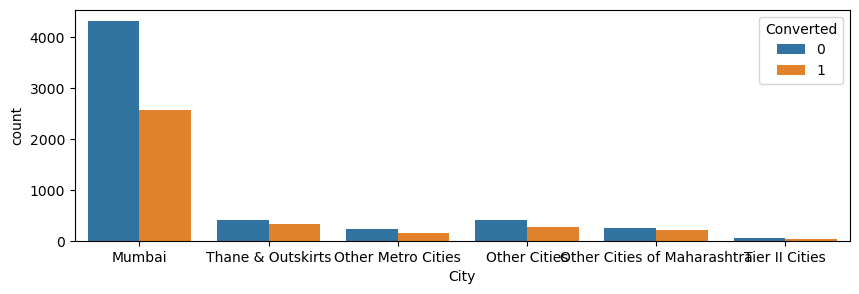

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(leads_df['City'], hue=leads_df['Converted'])

Analyse 'Specialization' column

In [20]:
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Null values can be categorised as 'Others' instead of imputing with the mode as the correct specialization is not present in the picklist

In [21]:
leads_df['Specialization'].replace(np.nan, 'Others', inplace=True)

Grouping all the Management Specializations into one

In [22]:
for specialization in list(leads_df['Specialization'].unique()):
    if specialization.__contains__('Management'):
        leads_df['Specialization'].replace(specialization, 'Management Specialization', inplace=True)

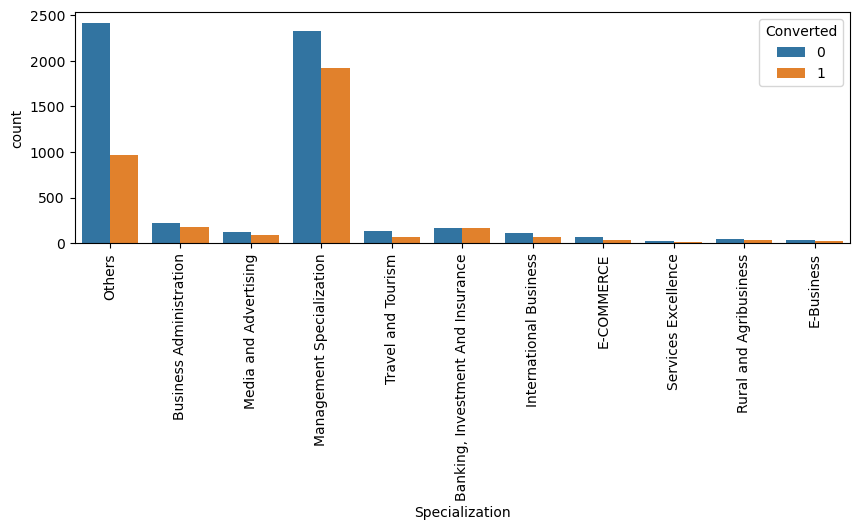

In [23]:
plt.figure(figsize=(10,3))
fig1 = sns.countplot(leads_df['Specialization'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
plt.show()

Analyse 'What is your current occupation' column

In [24]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
leads_df['What is your current occupation'].replace(np.nan, 'Unemployed', inplace=True)

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

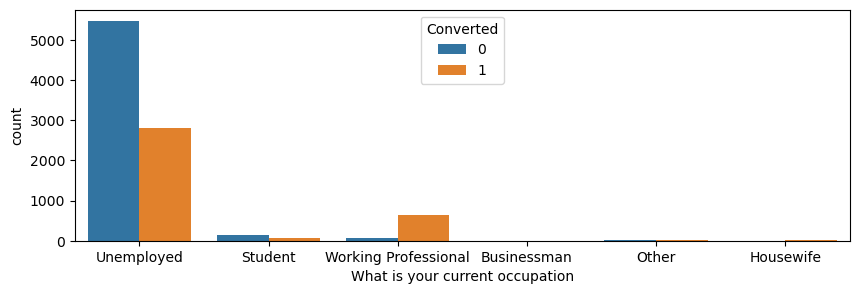

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(leads_df['What is your current occupation'],hue=leads_df['Converted'])


It's clear that the leads who're working professionals have a very high chance of conversion

More number of leads are from people who are unemployed

Analyse column 'What matters to you in choosing a course'

In [27]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

It's very clear that one category contributes to all the rows if nan is eliminated, even if nan is imputed with the mode, all the rows will have the same value which is of no use in predicting th etarget variable


'What matters most to you in choosing a course' column can be droppped

In [28]:
leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

Analyse 'Lead Source' Column

In [29]:
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Let's replace nan and all single digit categories into Others

In [30]:
lead_source_count = pd.DataFrame(leads_df['Lead Source'].value_counts(dropna=False))
for category in list(lead_source_count[lead_source_count['Lead Source']<10].index):
    leads_df['Lead Source'].replace(category, 'Others', inplace=True)

In [31]:
leads_df['Lead Source'].replace(np.nan, 'Others', inplace=True)

In [32]:
leads_df['Lead Source'].value_counts(dropna=False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                64
Facebook              55
Name: Lead Source, dtype: int64

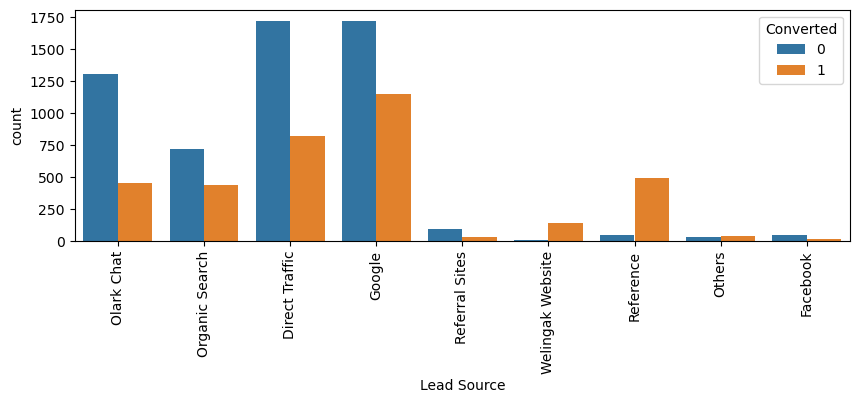

In [33]:
plt.figure(figsize=(10,3))
fig2 = sns.countplot(leads_df['Lead Source'], hue=leads_df['Converted'])
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
plt.show()

Proportion of leads converted is highest in reference followed by welingak_website

Maximum number of leads are from direct traffic and google

Organic search also has good conversion rate

Concentrate on increasing the reference and organic search lead base for more conversion

Analyse Last Activity Column

In [34]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Replace nan and all other categories with < 100 rows as others

In [35]:
last_activity_count = pd.DataFrame(leads_df['Last Activity'].value_counts(dropna=False))
for category in list(last_activity_count[last_activity_count['Last Activity']<100].index):
    leads_df['Last Activity'].replace(category, 'Others', inplace=True)

In [36]:
leads_df['Last Activity'].replace(np.nan, 'Others', inplace=True)
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

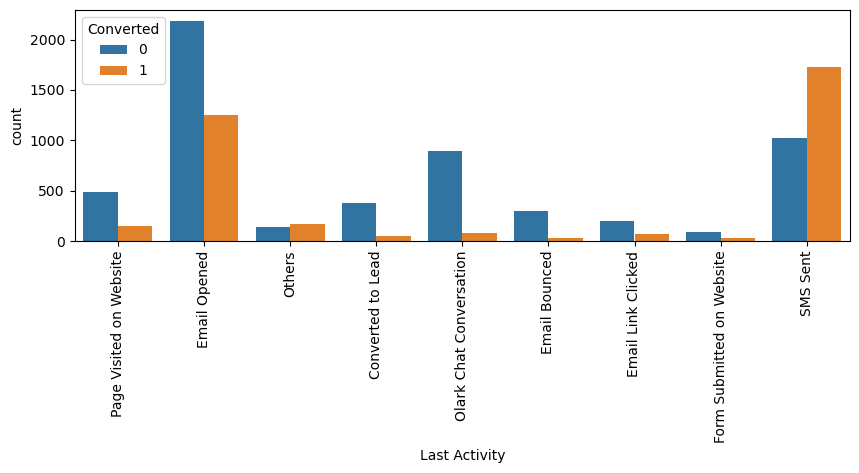

In [37]:
plt.figure(figsize=(10,3))
fig2 = sns.countplot(leads_df['Last Activity'], hue=leads_df['Converted'])
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
plt.show()

SMS is the last interaction channel where the lead conversion is the highest followed by email opened

Analyse 'Tags' Column

In [38]:
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [39]:
Tags_count = pd.DataFrame(leads_df['Tags'].value_counts(dropna=False))
for category in list(Tags_count[Tags_count['Tags']<100].index):
    leads_df['Tags'].replace(category, 'Others', inplace=True)

In [40]:
leads_df['Tags'].replace(np.nan, 'None', inplace=True)
leads_df['Tags'].value_counts(dropna=False)

None                                   3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

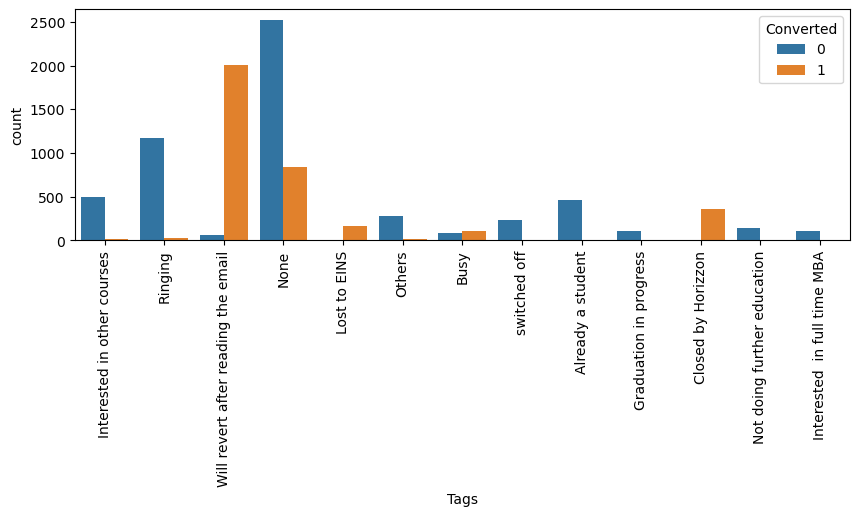

In [41]:
plt.figure(figsize=(10,3))
fig3 = sns.countplot(leads_df['Tags'], hue=leads_df['Converted'])
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90)
plt.show()

Will revert after reading the email tag have the highest conoversion proportion and also the absolute numbers followed by closed by horizzon interms of proportion

#### Check null values % one more time

In [42]:
(leads_df.isnull().sum()/leads_df.shape[0])*100

Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The In

Drop all the rows with null values, percentage is less than 2% in all the columns

In [43]:
leads_df.dropna(inplace=True)

In [44]:
leads_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Analyse 'Lead Origin' Column

In [45]:
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

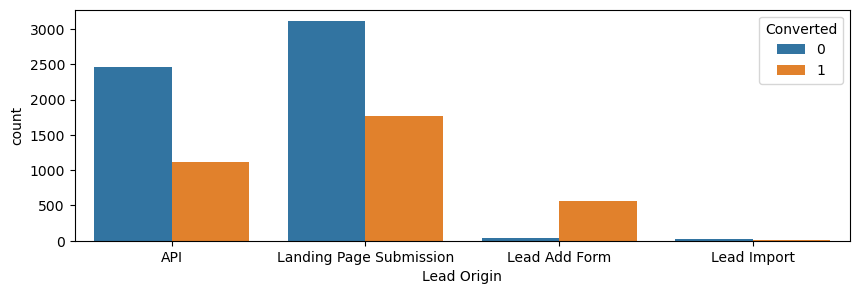

In [46]:
plt.figure(figsize=(10,3))
sns.countplot(leads_df['Lead Origin'], hue=leads_df['Converted'])

More no of leads come from API and Landing page submission and the conversion rate also looks good

Lead add form has the most conversion rate but the lead no is less

Concentrate more on incresing the convesion from API and Landing page submission

Analyse 'Do not call' column

In [47]:
leads_df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

All the rows belongs to only one category, this column can be dropped as it doesn't help in predicting the target variable

In [48]:
leads_df.drop('Do Not Call', axis=1, inplace=True)

Analyse 'Do not email' column

<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

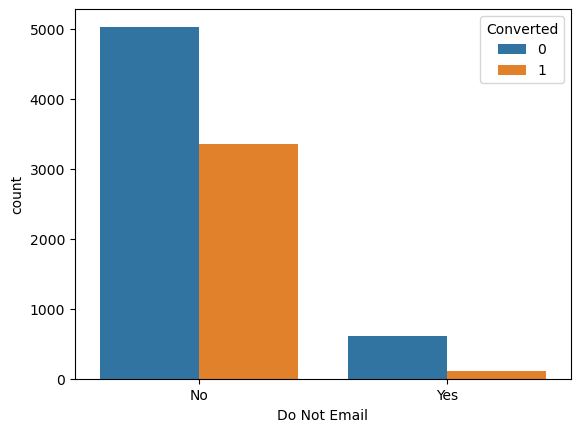

In [49]:
sns.countplot(leads_df['Do Not Email'], hue=leads_df['Converted'])

Analyse 'Search' column

In [50]:
leads_df['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

'Search' column can be dropped beacause it has only one category for all the rows which doesn't help to predict the target variable

In [51]:
leads_df.drop('Search', axis=1, inplace=True)

Analyse 'Newspaper Article' column

In [52]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

'Newspaper Article' can be dropped beacuse it's imbalanced and almost all the rows has one value which will not help to predict the target variable

In [53]:
leads_df.drop('Newspaper Article', axis=1, inplace=True)

Analyse 'Education Forums' Column

In [54]:
leads_df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

'X Education Forums'column can be dropped beacuse all the rows contains the same value and no help in predicting the target variable

Analyse ['Newspaper', 'Digital Advertisement', 'Through Recommendations'] columns

In [55]:
leads_df.drop('X Education Forums', axis=1, inplace=True)

In [56]:
for column in ['Newspaper', 'Digital Advertisement', 'Through Recommendations']:
    print(column)
    print(leads_df[column].value_counts(dropna=False), "\n")

Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64 

Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64 

Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64 



In all the three columns, there is only one value in all the rows which will not help in anyway to prdict if the lead is converted or not, all of these can be dropped

In [57]:
leads_df.drop(['Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)

Analyse 'A free copy of mastering the interview' column

In [58]:
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

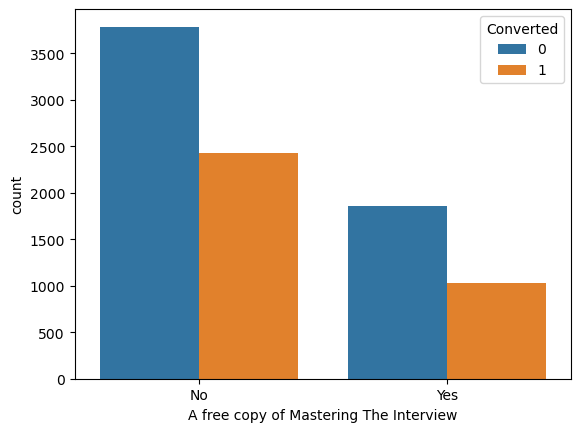

In [59]:
sns.countplot(leads_df['A free copy of Mastering The Interview'], hue=leads_df['Converted'])

More no of leads said no for a free copy of mastering the interview and the lead conversion proprtion is also high here

Analyse 'Last Notable Activity' Column

In [60]:
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

Grouping all the categories with less than 100 rows as Other Activity

In [61]:
activity_count = pd.DataFrame(leads_df['Last Notable Activity'].value_counts(dropna=False))
for category in list(activity_count[activity_count['Last Notable Activity']<100].index):
    leads_df['Last Notable Activity'].replace(category, 'Others', inplace=True)

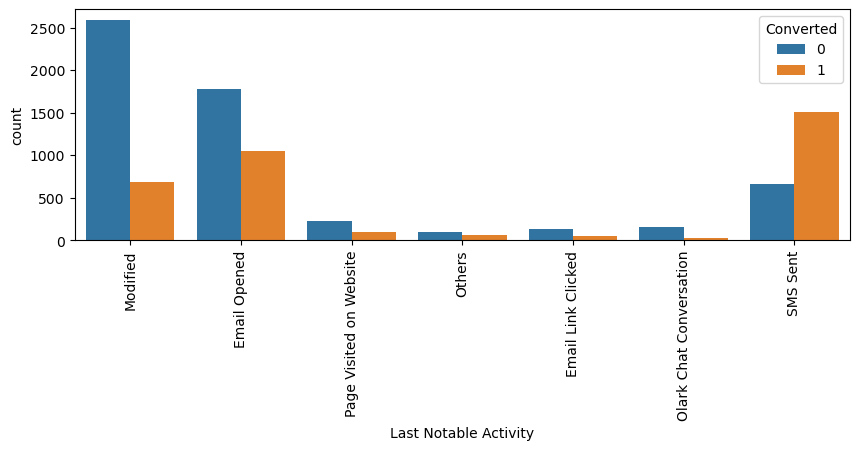

In [62]:
plt.figure(figsize=(10,3))
fig4 = sns.countplot(leads_df['Last Notable Activity'], hue=leads_df['Converted'])
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=90)
plt.show()

### Numerical Variable Analysis

Analyse the target column i.e converted

In [63]:
(leads_df['Converted'].value_counts(dropna=False)/leads_df.shape[0])*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

Check the correlation using heatmap

<AxesSubplot:>

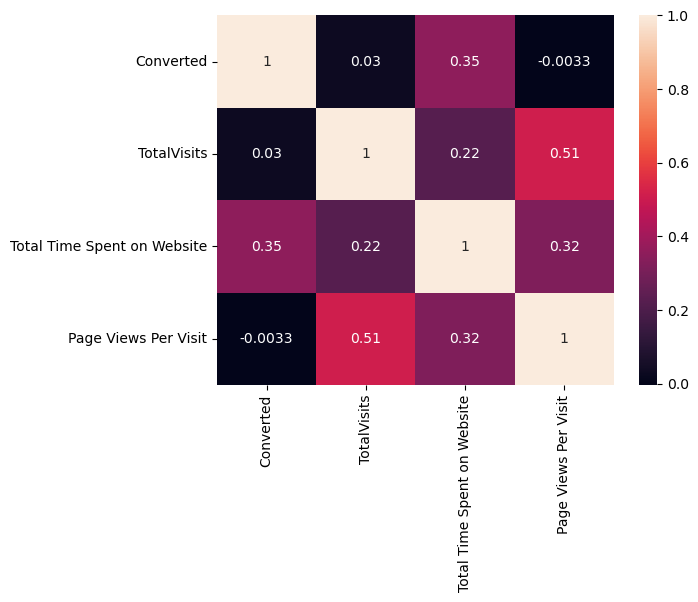

In [64]:
sns.heatmap(leads_df.corr(), annot=True)

There is good psitive correlation between total time spent on website and the conversion

Total Visits and page views per visit are almost having negligible affect on the target variable i.e converted

Analyse 'TotalVisits' Column

<AxesSubplot:xlabel='TotalVisits'>

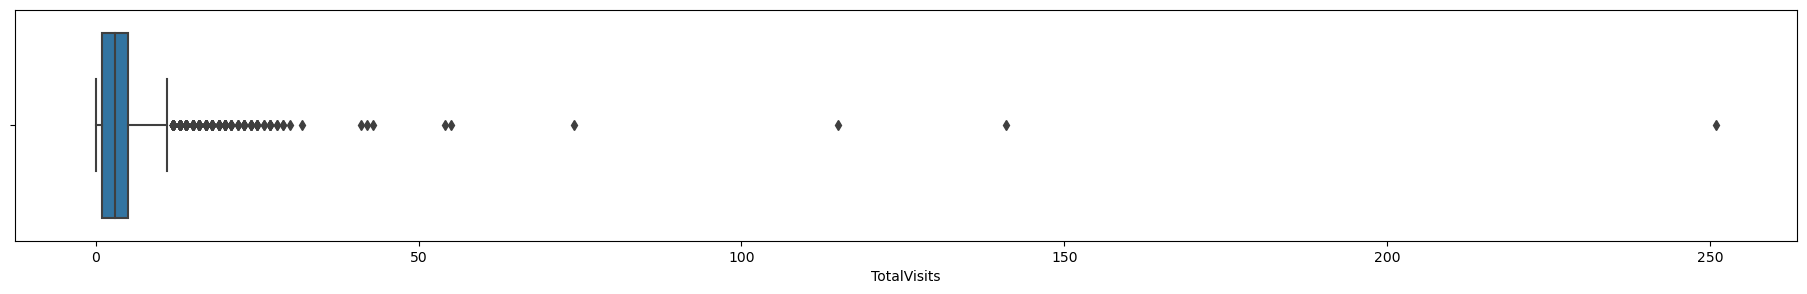

In [65]:
plt.figure(figsize=(23,3))
sns.boxplot(leads_df['TotalVisits'])

It's clear that there are outliers in the column

In [66]:
leads_df['TotalVisits'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
10%         0.000000
20%         0.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [67]:
### outlier removal by removing the rows with top and bottom 1 % of the totalvisits

top_1_percent = leads_df['TotalVisits'].quantile(0.99)
leads_df = leads_df[leads_df['TotalVisits']<top_1_percent]
bottom_1_percent = leads_df['TotalVisits'].quantile(0.01)
leads_df = leads_df[leads_df['TotalVisits']>bottom_1_percent]

<AxesSubplot:xlabel='TotalVisits'>

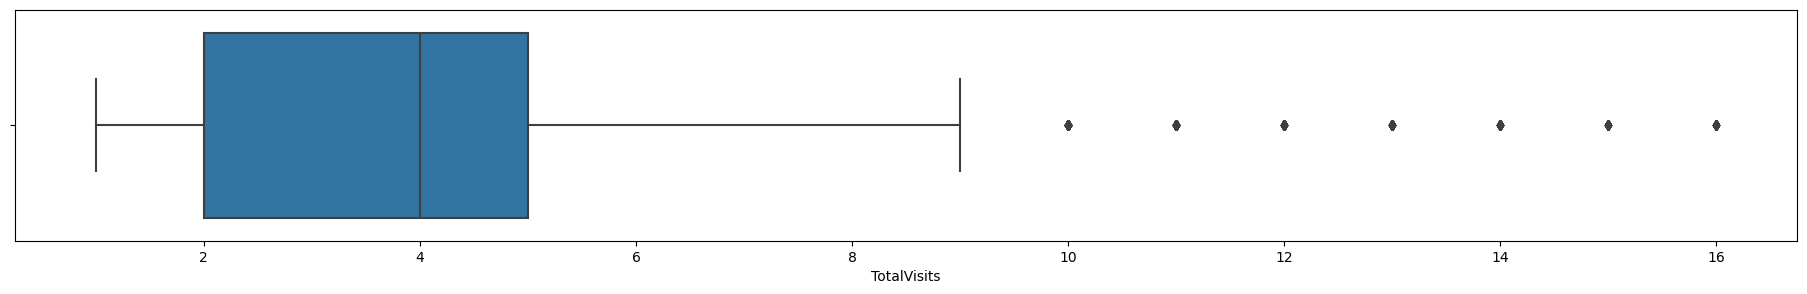

In [68]:
plt.figure(figsize=(23,3))
sns.boxplot(leads_df['TotalVisits'])

Analyse 'Total Time Spent On Website' Column

<AxesSubplot:xlabel='Total Time Spent on Website'>

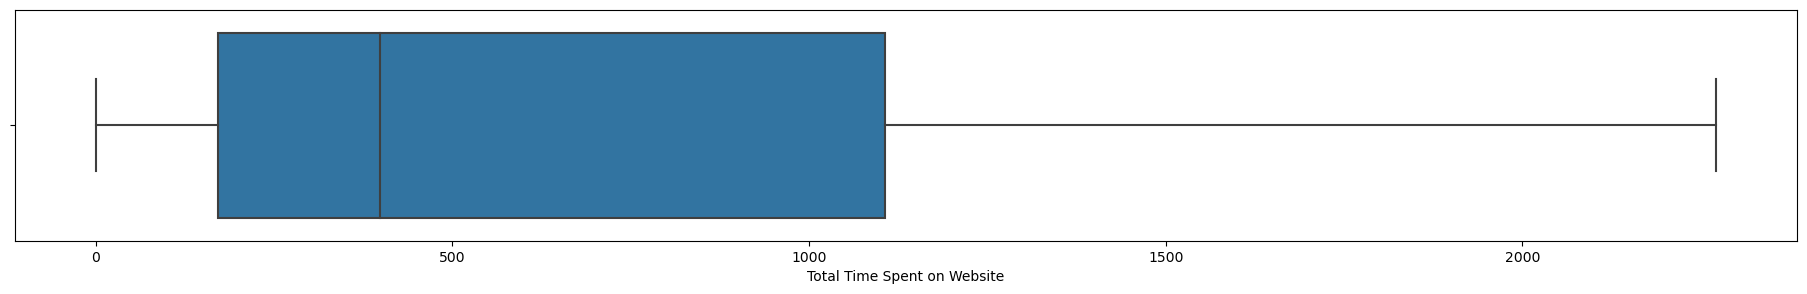

In [69]:
plt.figure(figsize=(23,3))
sns.boxplot(leads_df['Total Time Spent on Website'])

There are no outliers here

Analyse 'Page Views Per Visit' Column

<AxesSubplot:xlabel='Page Views Per Visit'>

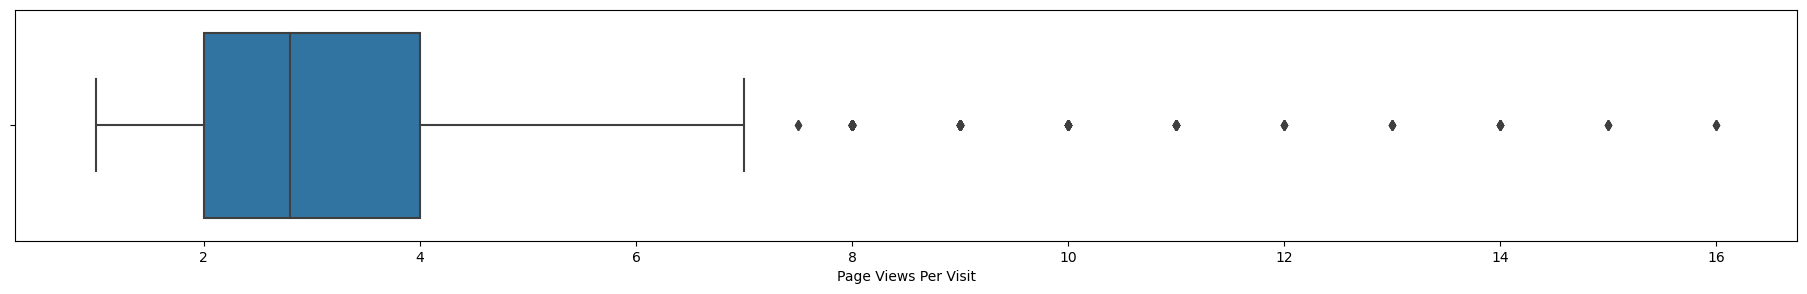

In [70]:
plt.figure(figsize=(23,3))
sns.boxplot(leads_df['Page Views Per Visit'])

In [71]:
leads_df['Page Views Per Visit'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count    6815.000000
mean        3.084374
std         1.817519
min         1.000000
10%         1.250000
20%         2.000000
30%         2.000000
40%         2.000000
50%         2.800000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

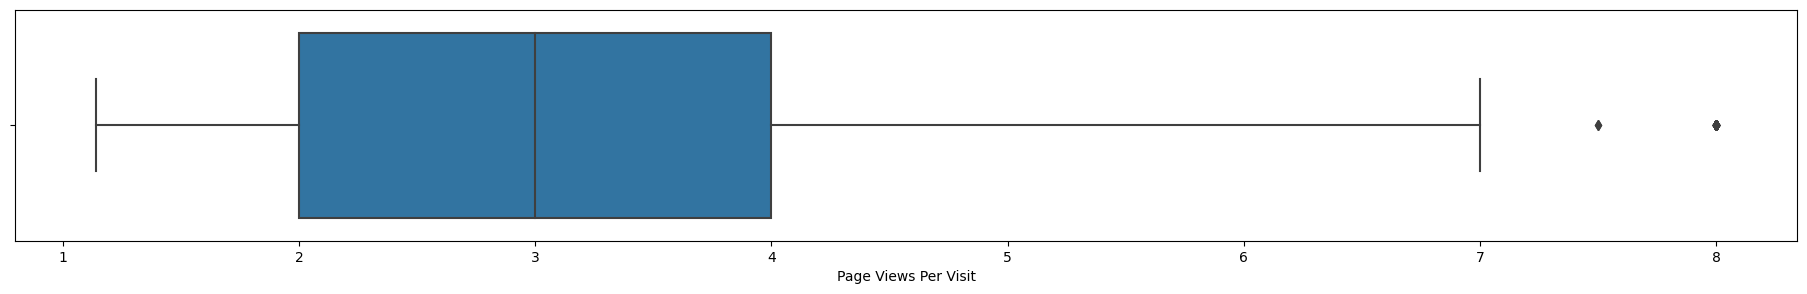

In [72]:
### outlier removal by removing the rows with top and bottom 1 % of the totalvisits

top_1_percent = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[leads_df['Page Views Per Visit']<top_1_percent]
bottom_1_percent = leads_df['Page Views Per Visit'].quantile(0.01)
leads_df = leads_df[leads_df['Page Views Per Visit']>bottom_1_percent]
plt.figure(figsize=(23,3))
sns.boxplot(leads_df['Page Views Per Visit'])

Bivariate analysis on columns ['Page Views Per Visit','TotalVisits','Total Time Spent on Website'] vs the converted column

Page Views Per Visit -Convereted


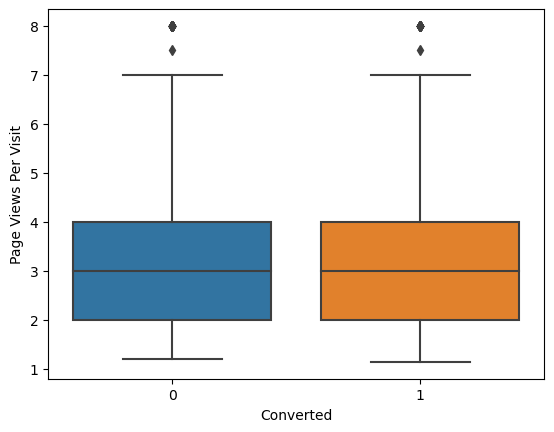

None
TotalVisits -Convereted


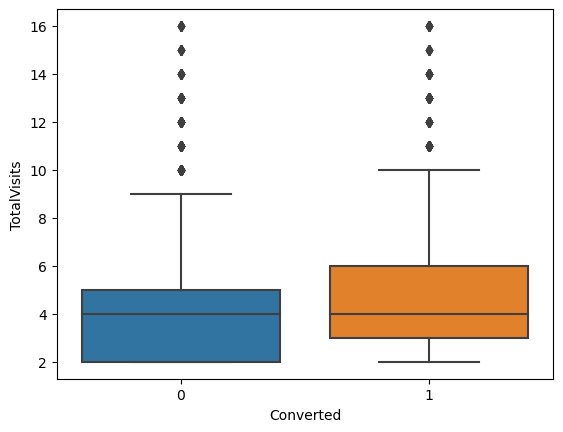

None
Total Time Spent on Website -Convereted


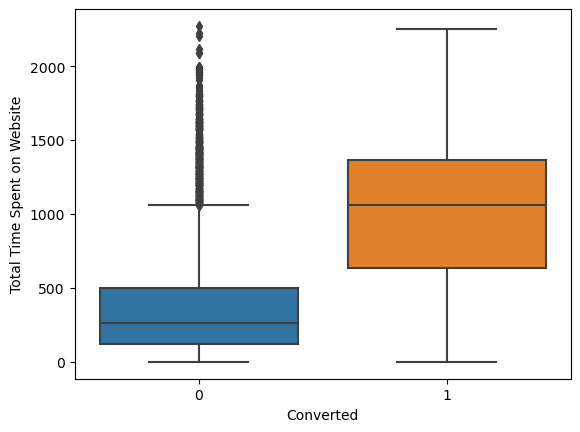

None


In [73]:
for column in ['Page Views Per Visit','TotalVisits','Total Time Spent on Website']:
    print(column,'-Convereted')
    sns.boxplot(y=column, x='Converted', data=leads_df)
    print(plt.show())

Pgae views per visit doen't look like there is any relation with the converted column as bith yes and no have similar kind of distribution

TotalVisits is also having same median value for both converted yes and no ctaegories, nothing is stronlgy evident here

Total time spent on website median value is way higher for converted leads than thos which are not, it's evident that more the time spent on website, lead conversion probability is higher

### Creating Dummy Variables

In [74]:
### categorical variables unique values
categorical_columns = []
for col in leads_df.columns:
    if leads_df[col].dtype == 'object':  
        categorical_columns.append(col)
        print(col,':')
        print(leads_df[col].unique())
        print('----------------------------')

Lead Origin :
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
----------------------------
Lead Source :
['Organic Search' 'Direct Traffic' 'Google' 'Referral Sites' 'Olark Chat'
 'Others' 'Reference' 'Facebook' 'Welingak Website']
----------------------------
Do Not Email :
['No' 'Yes']
----------------------------
Last Activity :
['Email Opened' 'Page Visited on Website' 'Email Link Clicked'
 'Form Submitted on Website' 'Others' 'Olark Chat Conversation'
 'Email Bounced' 'Converted to Lead' 'SMS Sent']
----------------------------
Specialization :
['Others' 'Business Administration' 'Management Specialization'
 'Travel and Tourism' 'Media and Advertising' 'International Business'
 'E-COMMERCE' 'Services Excellence' 'Banking, Investment And Insurance'
 'Rural and Agribusiness' 'E-Business']
----------------------------
What is your current occupation :
['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 'Housewife']
----------------------------
Tags :

##### Map Variable with Yes/No categories to 1/0

In [75]:
variables = ['A free copy of Mastering The Interview', 'Do Not Email']
for variable in variables:
    leads_df[variable].map({'Yes':1,'No':0})

##### Get dummies for the other columns in the data

In [76]:
for column in categorical_columns:
    if column not in variables:
        dummies = pd.get_dummies(leads_df[column], prefix=column)
        leads_df = pd.concat([leads_df,dummies],1)
    elif column not in variables and column in ['Lead Origin','What is your current occupation','City']:
        dummies=pd.get_dummies(leads_df[column], drop_first=True)
        leads_df = pd.concat([leads_df,dummies],1)

In [77]:
leads_df.drop(['Specialization_Others','Lead Source_Others','Last Activity_Others','Last Notable Activity_Others','Tags_Others'], axis=1, inplace=True)

In [78]:
leads_df.drop(categorical_columns, axis=1, inplace=True) ### dropping the riginal columns where dummie cretion is performed

### Model Building

In [79]:
### assign X and y from the leads_df

y = leads_df['Converted']
X = leads_df.drop('Converted', axis=1)

In [80]:
### split the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 23)

In [81]:
X_train.shape

(4236, 63)

In [82]:
X_test.shape

(1816, 63)

#### Scaling the columns with numbers

In [83]:
scaler = StandardScaler()

for column in list(X_train.columns):
    if (X_train[column].dtype == 'int64' or X_train[column].dtype == 'float64'):
        X_train[[column]] = scaler.fit_transform(X_train[[column]])

In [84]:
X_train.head(5)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_None,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5306,-0.550467,0.869242,-0.124341,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2509,-0.550467,0.601811,-0.124341,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
7246,-0.550467,-0.835404,-0.124341,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2824,0.244141,-1.170148,1.238921,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8168,3.422577,-0.733526,2.261368,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### RFE to select the features and Statsmodel to build the model

In [85]:
logisticregression = LogisticRegression()
### rfe to get the 15 variables for model building
rfe = RFE(logisticregression, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Lead Origin_API', False, 39),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Reference', False, 42),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', False, 4),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', False, 47),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', False, 9),
 ('

In [87]:
###columns with rfe support_ as true
columns = list(X_train.columns[rfe.support_])

#### Model 1

In [88]:
X_train_sm = sm.add_constant(X_train[columns])
model_1 = sm.GLM(y_train, X_train_sm, sm.families.Binomial())
result_1 = model_1.fit()
print(result_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4236
Model:                            GLM   Df Residuals:                     4220
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -835.70
Date:                Sun, 05 Mar 2023   Deviance:                       1671.4
Time:                        22:20:12   Pearson chi2:                 5.06e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6045
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

remove columns with p value > 0.05

In [89]:
columns.remove('Tags_Interested in other courses')

In [90]:
columns.remove('Tags_Already a student')

In [91]:
columns.remove('Lead Origin_Lead Add Form')

#### Model 2

In [92]:
X_train_sm = sm.add_constant(X_train[columns])
model_2 = sm.GLM(y_train, X_train_sm, sm.families.Binomial())
result_2 = model_2.fit()
print(result_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4236
Model:                            GLM   Df Residuals:                     4223
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -839.70
Date:                Sun, 05 Mar 2023   Deviance:                       1679.4
Time:                        22:20:12   Pearson chi2:                 5.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6038
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All the p values are < 0.05 , let's move to VIF to check the multicollinearity

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['vif'] = [variance_inflation_factor(X_train[columns].values ,i) for i in range(X_train[columns].shape[1])]
vif.sort_values(by='vif', ascending=False)

,Features,vif
9,Tags_Will revert after reading the email,1.644171
11,Last Notable Activity_SMS Sent,1.573445
3,What is your current occupation_Working Profes...,1.276675
0,Total Time Spent on Website,1.181253
8,Tags_Ringing,1.131653
7,Tags_None,1.101510
4,Tags_Busy,1.052705
10,Tags_switched off,1.048066
5,Tags_Closed by Horizzon,1.038790
1,Last Activity_Converted to Lead,1.024520


#### Check the probabilities of the predictions

In [94]:
### predict the values on the train set
y_train_pred = result_2.predict(X_train_sm)
y_train_pred.values.reshape(-1)
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Probability':y_train_pred,'Primary key':y_train.index})

#### Check the optimum cutoff

<Figure size 300x2300 with 0 Axes>

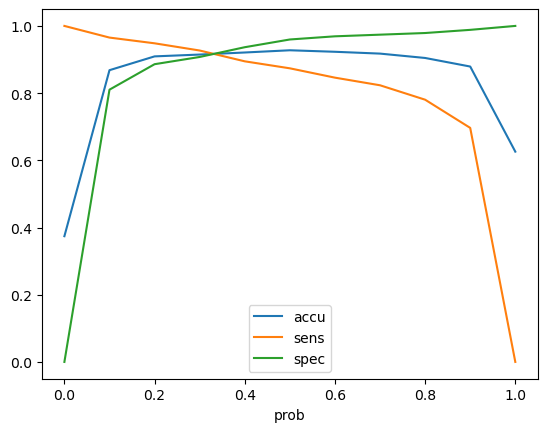

In [95]:
cut_off = [i/10 for i in range(11)]
for i in cut_off:
    y_train_pred_df[i] = y_train_pred_df['Probability'].apply(lambda x:1 if x > i else 0)
cut_off_df = pd.DataFrame(columns=['prob','accu','sens','spec'])
for i in cut_off:
    matrix_1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i] )
    total1=sum(sum(matrix_1))
    accu = (matrix_1[0,0]+matrix_1[1,1])/total1
    
    spec = matrix_1[0,0]/(matrix_1[0,0]+matrix_1[0,1])
    sens = matrix_1[1,1]/(matrix_1[1,0]+matrix_1[1,1])
    cut_off_df.loc[i] =[ i ,accu,sens,spec]
plt.figure(figsize=(3,23))
cut_off_df.plot.line(x='prob', y = ['accu','sens','spec'])
plt.show()

In [96]:
###0.3 is the optimum cut_off
y_train_pred_df['Predicted'] = y_train_pred_df['Probability'].apply(lambda x:1 if x>0.3 else 0)

In [97]:
y_train_pred_df = y_train_pred_df[['Converted','Probability','Primary key','Predicted']]

In [98]:
### get the confusion matrix to calculate the precision, recall, etc..
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Predicted'])
confusion_matrix

array([[2406,  245],
       [ 116, 1469]], dtype=int64)

In [99]:
### accuracy score
round((metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted']))*100,2)

91.48

In [100]:
true_positive = confusion_matrix[1,1]
true_negative = confusion_matrix[0,0]
false_positive = confusion_matrix[0,1]
false_negative = confusion_matrix[1,0]

In [101]:
### calculating sensitivity
round((true_positive/(true_positive + false_negative))*100,2)

92.68

In [102]:
### calculating specificity
round((true_negative/(true_negative + false_positive))*100,2)

90.76

In [103]:
### false-positive rate --- model saying as Converted when it's not in real life
round((false_positive/(false_positive+true_negative))*100,2)

9.24

In [104]:
### positive-predictive vaue
round((true_positive/(true_positive + false_positive))*100,2)

85.71

In [105]:
### negative predictive value
round((true_negative/(true_negative+false_negative))*100,2)

95.4

In [106]:
### precision
round((true_positive / (true_positive + false_positive))*100,2)

85.71

In [107]:
### recall
round((true_positive / (true_positive + false_negative))*100,2)

92.68

### ROC Curve

In [108]:
def roc(actual_value, probability):
    fpr, tpr, thresholds = metrics.roc_curve(actual_value, probability, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual_value, probability)
    plt.figure(figsize=(3,5))
    plt.plot(fpr, tpr, label = 'roc_curve'+str(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

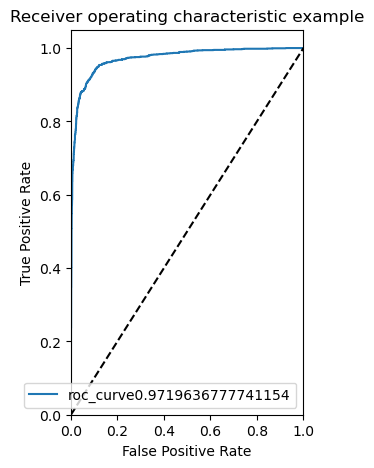

In [109]:
roc(y_train_pred_df['Converted'], y_train_pred_df['Probability'])

As the curve get's closer to one, it says that the model is good. As our model is closer (0.97) to 1, it's a good model

#### Plotting Precision Recall Curve

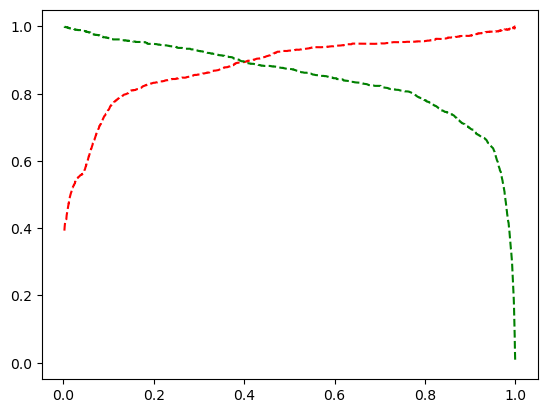

In [110]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_df['Converted'], y_train_pred_df['Probability'])
plt.plot(thresholds, precision[:-1],'r--')
plt.plot(thresholds, recall[:-1],'g--')
plt.show()

#### Scaling Test Set

In [111]:
numeric_columns = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])

In [112]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_None,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2726,0.259728,-0.064832,1.307901,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1041,1.070152,1.718259,0.254997,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2590,0.259728,0.411282,-0.446939,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3821,-0.145484,-1.116015,-0.797908,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
435,-0.145484,-0.634301,0.605965,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [113]:
X_test = X_test[columns]

In [114]:
X_test.head()

,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_None,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
2726,-0.064832,1,0,1,0,0,0,0,0,1,0,0
1041,1.718259,0,0,0,0,0,0,1,0,0,0,0
2590,0.411282,0,0,0,0,0,0,0,0,1,0,1
3821,-1.116015,0,0,0,0,0,0,0,0,0,1,0
435,-0.634301,0,0,0,0,0,0,0,1,0,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)

#### Prediction On Test Set

In [116]:
y_test_pred = result_2.predict(X_test_sm)

In [117]:
y_test_pred_df = pd.DataFrame(y_test_pred)

In [118]:
y_test_pred_df['Primary Key'] = y_test_pred.index

In [119]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Primary Key'] = y_test.index

In [120]:
y_test_df.reset_index(drop=True, inplace=True)
y_test_pred_df.reset_index(drop=True, inplace=True)

In [121]:
y_predicted_final = pd.concat([y_test_df, y_test_pred_df], axis=1)

In [128]:
y_predicted_final.rename(columns={ 0 : 'Probability'}, inplace=True)

In [131]:
y_predicted_final.head()

,Converted,Primary Key,Probability,Primary Key
0,1,2726,0.896421,2726
1,0,1041,0.535539,1041
2,1,2590,0.994344,2590
3,0,3821,0.001066,3821
4,0,435,0.003392,435


In [124]:
y_predicted_final['Predicted'] = y_predicted_final['Probability'].apply(lambda x : 1 if x>0.3 else 0)

In [125]:
### accuracy calc
round((metrics.accuracy_score(y_predicted_final['Converted'], y_predicted_final['Predicted']))*100,2)

91.57

In [126]:
confusion_matrix_2 = metrics.confusion_matrix(y_predicted_final['Converted'], y_predicted_final['Predicted'])
confusion_matrix_2

array([[1021,   98],
       [  55,  642]], dtype=int64)

In [127]:
true_positive = confusion_matrix_2[1,1]
true_negative = confusion_matrix_2[0,0]
false_positive = confusion_matrix_2[0,1]
false_negative = confusion_matrix_2[1,0]

In [128]:
### calculating sensitivity
round((true_positive/(true_positive + false_negative))*100,2)

92.11

In [129]:
### calculating specificity
round((true_negative/(true_negative + false_positive))*100,2)

91.24

In [130]:
### precision
round((true_positive / (true_positive + false_positive))*100,2)

86.76

In [131]:
### recall
round((true_positive / (true_positive + false_negative))*100,2)

92.11

### Comparision Between Train and Test Scores

Training:
    
    Accuracy: 91.48%
    
    Sensitivity: 92.68%
    
    Specificity: 90.76%
        
Testing:
    
    Accuracy: 91.57%
        
    Sensitivity: 92.11%
        
    Specificity: 91.24%

#### It's evident that the model is able to predict the conversion lead very well

### Correlation Heatmap

In [132]:
used_columns_for_model_building=list(vif['Features'])
used_columns_for_model_building.append('Converted')

In [133]:
used_columns_for_model_building

['Total Time Spent on Website',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_None',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Last Notable Activity_SMS Sent',
 'Converted']

<AxesSubplot:>

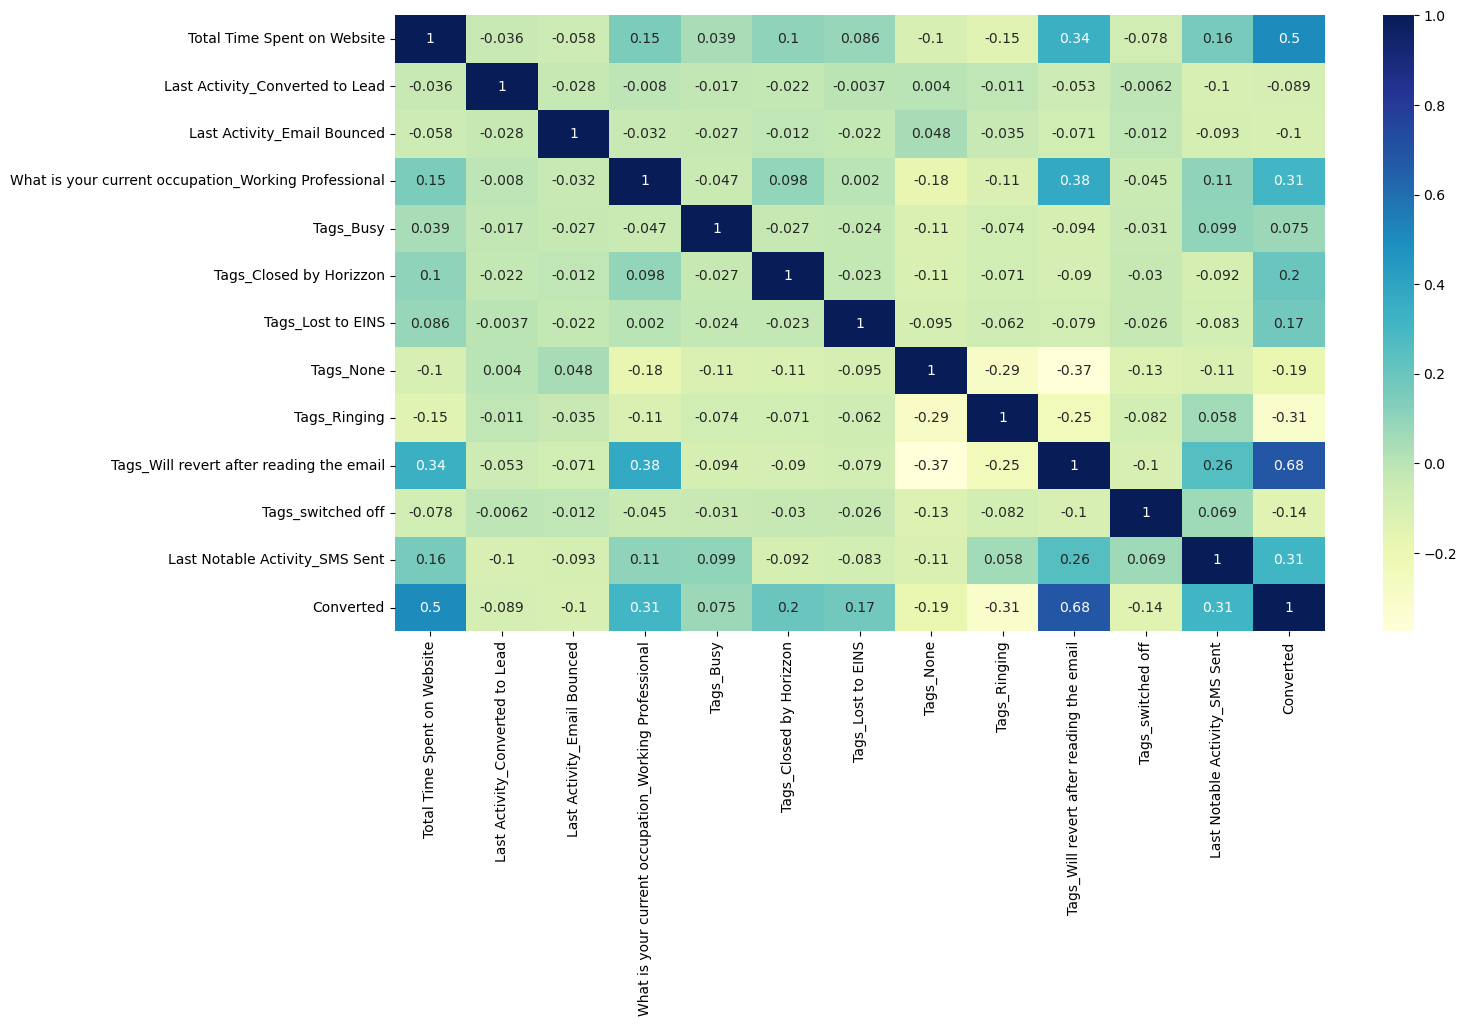

In [134]:
plt.figure(figsize=(15, 8))
sns.heatmap(leads_df[used_columns_for_model_building].corr(), annot=True, cmap="YlGnBu")

### Top 3 Predictor Variables:

    1 Tags_Will revert after reading the email
    2 Total Time Spent on Website
    3 What is your current occupation_Working Professional / Last Notable Activity_SMS Sent